Copyright (c) 2019 OERCompBiomed (UiB)

# Numpy

NumPy is the fundamental package needed for scientific computing with Python. NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes.

For a comprehensive introduction and tutorial on NumPy see the NumPy Manual at https://docs.scipy.org/doc/numpy/index.html and the [NumPy User Guide](https://docs.scipy.org/doc/numpy/user/index.html)

Some of the following is taken from the Python / Numpy tutorial for the Stanford CS class CS231n (Convolutional Neural Networks for Visual Recognition): http://cs231n.github.io/python-numpy-tutorial 

**You are encouraged to experiment with all our code!**

NOTE: The original notebook on Github might change over the time, and we recommend that you make a copy of our notebooks before you are editing them. In this respect you might adopt the naming convention my_<'name_of_notebook'>.ipynb, e.g. `my_1.1-numpy-basics.ipynb`

## Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the _rank_ of the array; the _shape_ of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [1]:
import numpy as np

print(np.__version__)

1.17.3


### Create a vector
Passing in a list (or other similar collection) of numbers will yield a rank 1 array, i.e. *vector*.

In [2]:
ls = [1,2,3]
print(ls, type(ls))
a = np.array(ls)
print(a, type(a))

[1, 2, 3] <class 'list'>
[1 2 3] <class 'numpy.ndarray'>


like the `len` function we used for lists, we use `.ndim` to get the rank of the array

In [3]:
a.ndim

1

And `.shape` for the actual dimensions

In [4]:
a.shape

(3,)

The benefit of vectors versus lists is apparent anytime you wish to do any math operation. For instance, multiply each element by 3.

In [5]:
print(ls*3) # this will not work
print(a*3) # this will work

[1, 2, 3, 1, 2, 3, 1, 2, 3]
[3 6 9]


Indexing an vector is just as you would expect

In [6]:
a[0]

1

And you can change entries with the syntax you have seen before

In [7]:
a[0] = 9
a

array([9, 2, 3])

### Create a higher rank array (matrix).
The matrix is constructed by passing in a list of lists

In [8]:
lls = [[1,2], [15,16], [5,5]]
b = np.array(lls)
b

array([[ 1,  2],
       [15, 16],
       [ 5,  5]])

Now we have a rank 2 array

#### Exercise 1. Show that b has a rank = 2. What are the dimensions?

In [9]:
# %load solutions/ex3_1.py
print(b.ndim == 2)

b.shape

True


(3, 2)

Notice we describe the shape as (rows x columns)

Again, indexing is very straight forward, just pass for the row number, then the column number as follows

In [10]:
print(b)
b[1, 0]

[[ 1  2]
 [15 16]
 [ 5  5]]


15

Numpy also provides many functions to create arrays:

In [11]:
a = np.arange(5)          # Create a vector 0..4
print(a)

b = np.zeros((2,2))   # Create an array of all zeros
print(b)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

c = np.ones((1,2))    # Create an array of all ones
print(c)              # Prints "[[ 1.  1.]]"

d = np.full((2,2), 7)  # Create a constant array
print(d)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

e = np.eye(2)         # Create a 2x2 identity matrix
print(e)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

f = np.random.random((2,2))  # Create an array filled with random values
print(f)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[0 1 2 3 4]
[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.66307724 0.26573205]
 [0.6027037  0.49155968]]


And finally you can change the shape of arrays. For instance, any array can be flattened into a vector:

In [12]:
a.flatten()

array([0, 1, 2, 3, 4])

What criteria must be fulfilled in order for the reshaping to not throw an error?

#### Exercise 2. Make an 5x5 array, all entries 7, except for the main diagonal which is 0

       [0., 7., 7., 7., 7.],
       [7., 0., 7., 7., 7.],
       [7., 7., 0., 7., 7.],
       [7., 7., 7., 0., 7.],
       [7., 7., 7., 7., 0.]]

In [13]:
# %load solutions/ex3_2.py
np.full((5,5), 7) - 7*np.eye(5)

array([[0., 7., 7., 7., 7.],
       [7., 0., 7., 7., 7.],
       [7., 7., 0., 7., 7.],
       [7., 7., 7., 0., 7.],
       [7., 7., 7., 7., 0.]])

## Array indexing

Numpy offers several ways to index into arrays.

**Slicing**: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [14]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.

print("a:\n", a)

print("b:\n", b)

print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

a:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
b:
 [[2 3]
 [6 7]]
2
77


#### Exercise 3. use slicing to select the (2x2) lower left corner of `a`.

In [15]:
# %load solutions/ex3_3.py
a[-2:, :2]

array([[ 5,  6],
       [ 9, 10]])

**Boolean array indexing**: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [16]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


we can also modify multiple values at once, for instance

In [17]:
print(a)
a[:, 0] = 100 
a

[[1 2]
 [3 4]
 [5 6]]


array([[100,   2],
       [100,   4],
       [100,   6]])

In [18]:
a = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]])

#### Exercise 4.a. Make a function that takes an array,  and return copy of the array, but all values less than a threshold k are set to zero.

NB! We don't want you to change the array *inplace*. Instead, make a copy of A: `B = A.copy()`

In [19]:
# %load solutions/ex3_4a.py
def make_zero(A, k):
    B = A.copy()
    B[B < k] = 0
    return B

#### b. Make a function `invert` that sets all negative entries positive. 
e.g. calling it on 

    [[0,1],
    [-2,4]]
should yield 

    [[0,1],
    [2,4]]

In [20]:
# %load solutions/ex3_4b.py
def invert(A):
    B = A.copy()
    B[B<0] *= -1
    return B

In [21]:
# test your function works as expected
a = np.arange(-8,8).reshape((4,4))
print(a)
invert(a)

[[-8 -7 -6 -5]
 [-4 -3 -2 -1]
 [ 0  1  2  3]
 [ 4  5  6  7]]


array([[8, 7, 6, 5],
       [4, 3, 2, 1],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

## Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [22]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the default datatype
print(x.dtype)         # Prints "int32"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int32
float64
int64


## Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [23]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [24]:
# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [25]:
# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [26]:
# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [27]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [28]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

In [29]:
x = np.array([[1,2],[3,4]])
x

array([[1, 2],
       [3, 4]])

In [30]:
print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [31]:
x = np.array([[1,2], [3,4]])
print(x)        

[[1 2]
 [3 4]]


In [32]:
print(x.T)

[[1 3]
 [2 4]]


In [33]:
# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)  
print(v.T)

[1 2 3]
[1 2 3]


The `reshape` function - shapes an array without changing data of array.

In [34]:
import numpy as np

array = np.arange(8) 
print("Original array : \n", array) 
  
# shape array with 2 rows and 4 columns 
array = np.arange(8).reshape(2, 4) 
print("\narray reshaped with 2 rows and 4 columns : \n", array) 
  
# shape array with 2 rows and 4 columns 
array = np.arange(8).reshape(4 ,2) 
print("\narray reshaped with 2 rows and 4 columns : \n", array) 
  
# Constructs 3D array 
array = np.arange(8).reshape(2, 2, 2) 
print("\nOriginal array reshaped to 3D : \n", array) 

Original array : 
 [0 1 2 3 4 5 6 7]

array reshaped with 2 rows and 4 columns : 
 [[0 1 2 3]
 [4 5 6 7]]

array reshaped with 2 rows and 4 columns : 
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]

Original array reshaped to 3D : 
 [[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


#### Exercise ???. Make a 5x5 matrix like below using `np.arange` and reshaping.


       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]]

In [35]:
#
np.arange(25).reshape((5,5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**We can use numpy's `where` function to find indices of array elements with a given value** 

In [36]:
import numpy as np

arr = np.array([[1, 4, 9], [1, 8, 27], [27, 16, 81]])
arr

array([[ 1,  4,  9],
       [ 1,  8, 27],
       [27, 16, 81]])

In [37]:
# Get the index of elements with value 27
result = np.where(arr == 27)
print(f'Tuple of arrays returned : [i j] = {result[0]},{result[1]}')

Tuple of arrays returned : [i j] = [1 2],[2 0]


In [38]:
# zip the 2 arrays to get the exact coordinates
listOfCoordinates= list(zip(result[0], result[1]))

**Now let’s iterate over the list of coordinates and print them i.e.**

In [39]:
# iterate over the list of coordinates
for cord in listOfCoordinates:
    print(cord)

(1, 2)
(2, 0)


## Comparing arrays

In [40]:
A = np.arange(12).reshape((3,4))
B = A.copy()

What datatype do you think the below code will yield?

In [41]:
A == B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

Probably not what you expected. Here the elements are compared one by one. The same applied for other comparators.

In [42]:
A != B

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

How can you find out if the whole array is the same? Numpy has a built-in function for that:

In [43]:
np.all(A == B)

True

and for times when we want to compare if two matrices are almost closely the same, we have a function for that too:

In [44]:
np.allclose(A, B)

True

we have another related function which will identify when at least one entry is True:

In [45]:
A = np.arange(-8,8).reshape((4,4))
B = -A
print(A,'\n'); print(B)

[[-8 -7 -6 -5]
 [-4 -3 -2 -1]
 [ 0  1  2  3]
 [ 4  5  6  7]] 

[[ 8  7  6  5]
 [ 4  3  2  1]
 [ 0 -1 -2 -3]
 [-4 -5 -6 -7]]


In [46]:
A == B

array([[False, False, False, False],
       [False, False, False, False],
       [ True, False, False, False],
       [False, False, False, False]])

In [47]:
np.any(A==B)

True

In [48]:
np.any(A!=A)

False

#### Exercise 5. Make a function that takes 2 arrays and returns how the percent similarity of them. It should yield 1 if all are the same and 0 if none are, 0.5 if half are the same etc.

Hint: it might be useful to know that you can convert between types using `array.astype()`.


In [49]:
# % load solutions/ex3_5.py
def similarity(A,B):
    x,y = np.shape(A)
    mx = x * y
    binar = (A==B).astype('int') #turn it from a boolean array to a binary (0 or 1) array
    tot = np.sum(binar) # each 'True' counts as 1 and False as 0
    
    return tot/mx

In [50]:
# should yield 0.0625, which is 1/16
similarity(A,B)

0.0625

# Images as arrays

Once we have in place the idea of a grid of numbers, the leap is small to consider digital image processing - around which much of biomedical informatics is focused, such as computer aided diagnosis from MRIs.

The skills you acquire in this notebook are invaluable when working with medical images, and as you will see in machine learning, in particular artificial neural networks.

In [594]:
from matplotlib import pyplot as plt

In [595]:
arr = np.array([[1,0,1],[0,1,1],[1,1,0]])
arr

array([[1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

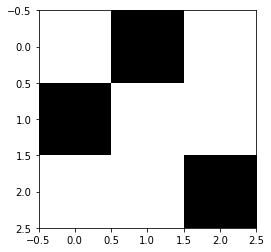

In [596]:
plt.imshow(arr, cmap='gray')

As you see, the 1s are white, and 0s gray. Values in between become various shades of gray:

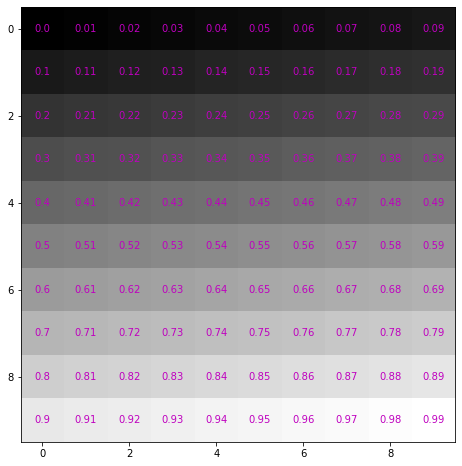

In [599]:
# never mind the code for plotting
arr = np.arange(100).reshape((10,10)) / 100
plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.imshow(arr, 'gray')

for (j,i),label in np.ndenumerate(arr):
    ax.text(i,j,label,ha='center',va='center', c='m')

In [600]:
from PIL import Image

In [601]:
im = Image.open('../assets/course_image_merja.jpg')

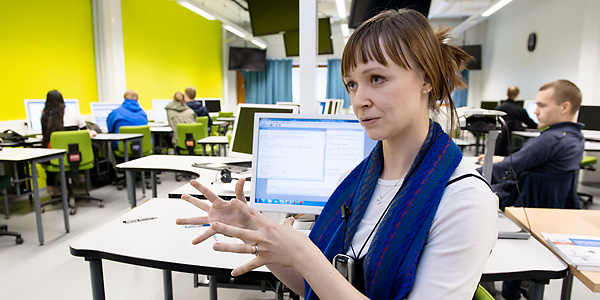

In [604]:
im

We can directly look at the pixel values of an image, but in this case the array is or rank 3, because we add an extra dimension to hold color information (Red,Green,Blue).

In [605]:
arr = np.asarray(im)

In [606]:
arr.shape

(300, 600, 3)

In [607]:
print(arr[:10, :10, 0]) # reds
print(arr[:10, :10, 1]) # greens
print(arr[:10, :10, 2]) # blues

[[173 173 173 173 175 176 176 176 176 177]
 [175 174 174 174 174 175 175 175 177 177]
 [176 175 174 174 175 175 176 176 177 177]
 [176 176 176 176 177 178 178 178 177 177]
 [176 177 177 178 178 178 178 179 177 178]
 [178 178 179 179 179 178 178 178 178 178]
 [178 179 180 180 179 179 179 179 179 179]
 [178 179 179 180 179 179 180 180 182 182]
 [178 179 179 179 180 180 181 181 183 183]
 [180 180 180 180 180 181 181 181 183 183]]
[[178 178 178 178 180 181 181 181 181 180]
 [180 179 179 179 179 180 180 180 180 180]
 [181 180 179 179 180 180 181 181 180 180]
 [179 179 179 179 180 181 181 182 180 180]
 [179 180 180 181 182 182 182 183 181 182]
 [181 181 183 183 183 182 182 182 182 182]
 [182 183 184 184 183 183 183 183 183 183]
 [182 183 183 184 183 183 184 184 183 183]
 [182 183 183 183 184 184 185 185 184 184]
 [184 184 184 184 184 185 185 185 184 184]]
[[0 0 0 0 2 1 1 1 3 1]
 [2 1 1 1 1 0 0 0 1 1]
 [3 2 1 0 0 0 1 1 1 1]
 [0 0 0 0 1 2 2 1 1 1]
 [0 1 1 2 1 1 1 2 0 1]
 [2 2 2 2 2 1 1 1 1 1]


#### Exercise. Plot upper left corner (100x100 pixels).

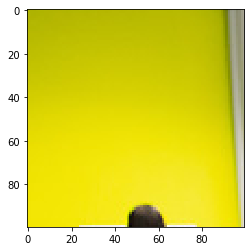

In [608]:
plt.imshow(arr[:100,:100,:])

##  A more advanced linear algebra example

Independent component analysis is a decomposition technique used to identify independent sources from a mixture (or rather multiple mixes) of signals. For instance, when you find yourself in a party, your ears don't have a separate channel for each voice, but receive a single concoction of sounds from a whole array of sources.

In [516]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import FastICA

In [609]:
filenames = ['assets/castle.jpg', 'assets/quas.jpg', 'assets/wave.jpg']
im1,im2,im3 = [Image.open(fn) for fn in filenames]

In [610]:
# resize according to smallest image

In [611]:
sz = im3.size
im1 = im1.resize(sz)
im2 = im2.resize(sz)

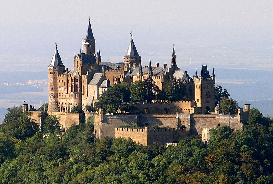

In [612]:
im1

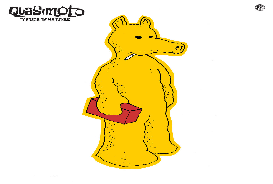

In [613]:
im2

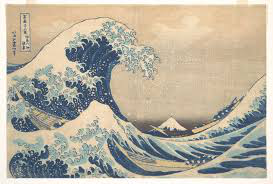

In [614]:
im3

### Greyscale for simplicity

In [615]:
from PIL import ImageOps

gim1,gim2,gim3 = [ImageOps.grayscale(im) for im in (im1,im2,im3)]

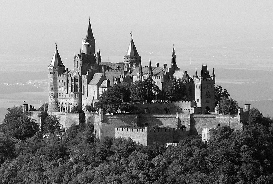

In [616]:
gim1

### Reshape and stack the images

ICA requires our whole dataset to be fed as a (NxD) matrix, in which each image is a column

In [619]:
S = []
for i, pic in enumerate((gim1,gim2,gim3)):
    s = np.ravel(pic)
    S.append(s)
    
S = np.asarray(S).T

In [620]:
S.shape

(50232, 3)

#### Make linear combination of images

Now we make linear combinations of the images. We do it 3 times (image having 3 microphones in a room with multiple signals)

In [622]:
# mixing matrix
A = np.random.randn(3,3)
#print("mixing matrix = \n{}".format(self.A))

# mixed data
X = S @ A.T

In [623]:
#image = Image.blend(im1, im2, .5)
#image = Image.blend(fst, im3, .5)
#image

#### Display the linear combinations

In [624]:
scaler = MinMaxScaler(feature_range=(0, 255))

def plot(X, i):
    m1 = X[:,i]
    m1 = scaler.fit_transform(m1.reshape(-1,1))
    plt.imshow(m1.reshape(sz[::-1]), cmap='gray'); plt.show()

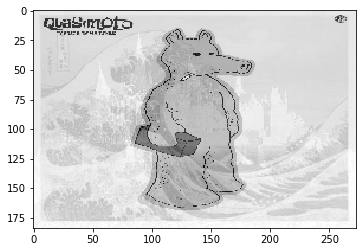

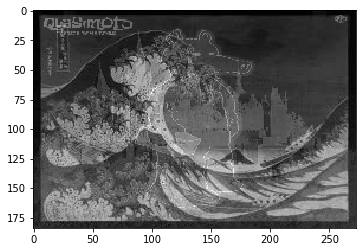

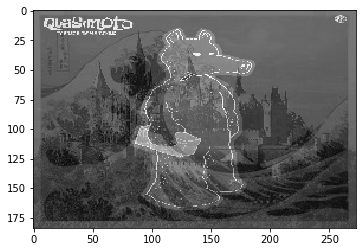

In [625]:
for i in range(A.shape[0]): plot(X, i)

The above is all our algorithm will be able to see. It has no gain to the original separated images.

#### Rescale the images before doing ICA

In [626]:
X_standard_scaler = StandardScaler()
X = X_standard_scaler.fit_transform(X)

## Do the ICA

In [628]:
ica = FastICA(n_components=3, random_state=0)
S_ = ica.fit_transform(X)  # estimated sources
#A_ = ica.mixing_  # estimated mixing matrix

### Inspect the reconstructions

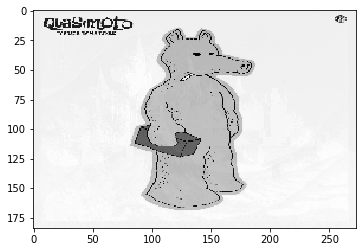

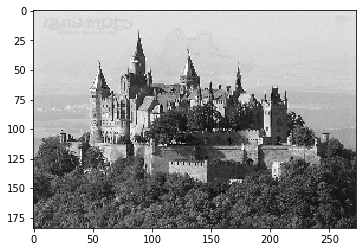

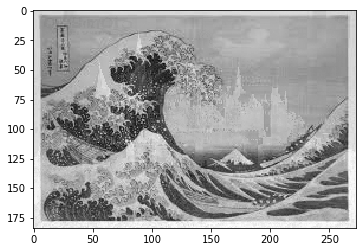

In [629]:
for i in range(3): plot(S_,i)

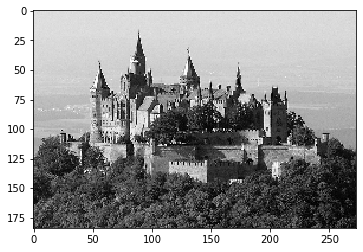

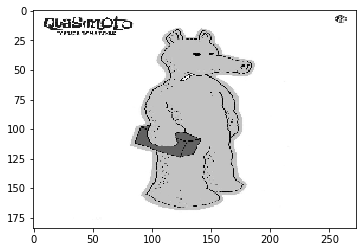

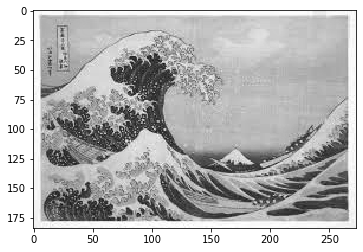

In [630]:
for i in range(3): plot(S,i)

### 
While the reconstructions are not perfect, they are certainly impressive given the speed and ease to implement.

In [4]:
import numpy as np
 

def main():
    print("*** Find the index of an element in 1D Numpy Array ***")
 
    # Create a numpy array from a list of numbers
    arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])
 
    # Get the index of elements with value 15
    result = np.where(arr == 15)
 
    print('Tuple of arrays returned : ', result)
    print("Elements with value 15 exists at following indices", result[0], sep='\n')
    print('First Index of element with value 15 is : ', result[0][0])
 
    # If given element doesn't exist in the array then it will return an empty array
    result = np.where(arr == 111)
    print('Empty Array returned : ', result)
    print("value 111 exists at following indices", result[0], sep='\n')
 
    print("*** Find the index of an element in 2D Numpy Array ***")
 
    # Create a 2D Numpy array from list of lists
    arr = np.array([[11, 12, 13],
                    [14, 15, 16],
                    [17, 15, 11],
                    [12, 14, 15]])
 
    print('Contents of 2D Numpy Array', arr, sep='\n')
 
    # Get the index of elements with value 17
    result = np.where(arr == 15)
 
    print('Tuple of arrays returned : ', result)
 
    print('List of coordinates where element with value 15 exists in given 2D array : ')
    # zip the 2 arrays to get the exact coordinates
    listOfCoordinates = list(zip(result[0], result[1]))
    # iterate over the list of coordinates
    for cord in listOfCoordinates:
        print(cord)
 
    print("*** Get the index of an element based on multiple conditions Numpy Array ***")
 
    # Create a numpy array from a list of numbers
    arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])
 
    # Get the index of elements with value less than 16 and greater than 12
    result = np.where((arr > 12) & (arr < 16))
    print("Elements with value less than 16 and greater than 12 exists at following indices", result, sep='\n')
 
    print("*** Get the first index of an element in Numpy Array ***")
 
    result = np.where(arr == 15)
    if len(result) > 0 and len(result[0]) > 0:
        print('First Index of element with value 15 is ', result[0][0])
 
 
if __name__ == '__main__':
    main()

*** Find the index of an element in 1D Numpy Array ***
Tuple of arrays returned :  (array([ 4,  7, 11], dtype=int64),)
Elements with value 15 exists at following indices
[ 4  7 11]
First Index of element with value 15 is :  4
Empty Array returned :  (array([], dtype=int64),)
value 111 exists at following indices
[]
*** Find the index of an element in 2D Numpy Array ***
Contents of 2D Numpy Array
[[11 12 13]
 [14 15 16]
 [17 15 11]
 [12 14 15]]
Tuple of arrays returned :  (array([1, 2, 3], dtype=int64), array([1, 1, 2], dtype=int64))
List of coordinates where element with value 15 exists in given 2D array : 
(1, 1)
(2, 1)
(3, 2)
*** Get the index of an element based on multiple conditions Numpy Array ***
Elements with value less than 16 and greater than 12 exists at following indices
(array([ 2,  3,  4,  7, 10, 11], dtype=int64),)
*** Get the first index of an element in Numpy Array ***
First Index of element with value 15 is  4
